# Processing text

The promise of text analysis, to me, appears to be the greatest generator of interest from social scientists into computational, quantitative research. 

The quantitative analysis of text can return some impressive findings/analytics that aid research questions---however, the difficulty curve rises rapidly as you look to further refine and include detail in your model (as opposed to other areas in Computational Social Science).

# The basics of text

To start I want to show you the basics of working with text **largely without any packages**. Why? Because you should walk before you run and before you use *automagic* functions you should gain intuition about the text itself. 

To start we will work with a document that most of you will have some experience with, *Othello* (`../data/Othello.txt`)

In [13]:
!head -n13 ../data/Othello.txt

SCENE: Venice and Cyprus

ACT I. SCENE I.
Venice. A street.

Enter Roderigo and Iago.

  RODERIGO. Tush, never tell me! I take it much unkindly
    That thou, Iago, who hast had my purse
    As if the strings were thine, shouldst know of this.
  IAGO. 'Sblood, but you will not hear me.
    If ever I did dream of such a matter,
    Abhor me.


We shoul always start with a look at the file to gain a sesne of what is going on.

Within the first 13 lines we already have an example of organizational text, scene directions, and dialogue. 

If we open the entire file and split on `SCENE` we should be able to get a quick sense of how the scene ending/begins transition is handled

In [1]:
print('hello')

hello


In [14]:
othello_full = open('../data/Othello.txt').read()
split_scene = othello_full.split('SCENE')
#Print through the scenes
for i in [2, 3]: 
    print(split_scene[i][:100])
    print('------')
    print(split_scene[i][-100:])
    print('------')

 I.
Venice. A street.

Enter Roderigo and Iago.

  RODERIGO. Tush, never tell me! I take it much unk
------
pecial officers of night.
    On, good Roderigo, I'll deserve your pains.               Exeunt.





------
 II.
Another street.

Enter Othello, Iago, and Attendants with torches.

  IAGO. Though in the trade
------
ns may have passage free,
    Bond slaves and pagans shall our statesmen be.            Exeunt.





------


Notice a pattern? Can you think of a way to clean up non-dialogue text to make our job of extracting dialogue easier?

In [15]:
#Exercise

















Our goal is to now separate out the dialogue for each individual character.

Create a dictionary with the character name as the key and all of the characters dialogue as a list of lines.

In [17]:
#Exercise


From this point there are many roads that we can take and this data will serve as our foundation. We will not modify the `char_dialogue` dictionary directly to maintain flexibility for different analytical approaches.

# Bag of words

A powerful, if surprising, analytical approach is one where essentially all structure from the text is disregarded. This approach is called appropriately called the bag of words and it can be extremely useful when we have a sufficient volume of text to analyze at an aggregate level.

As a first step, we should clean all of the lines into indiviudal words (removing punctuation).

In [20]:
#Exercise


At the most basic level, we can quickly get a sense of how much each character speaks.

In [22]:
import operator
sorted(char_words, key=lambda k: len(char_words[k]), reverse=True)

['IAGO.',
 'OTHELLO.',
 'DESDEMONA.',
 'CASSIO.',
 'EMILIA.',
 'BRABANTIO.',
 'RODERIGO.',
 'LODOVICO.',
 'DUKE.',
 'MONTANO.',
 'BIANCA.',
 'CLOWN.',
 'GRATIANO.',
 'HERALD.',
 'MESSENGER.',
 'SAILOR.',
 'ALL.',
 'GENTLEMEN.']

And visualize the distribution of word frequencies. Her we will plot this as a ranked plot (so rank vs. frequency) for each character.

In [23]:
#Exercise


# Zipf's law

Zipf's law is an empirical one, that was discovered by the linguist George Kingsley Zipf. 

This law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent, and so on and so forth.

Visually this pattern will emerge as a fat-tailed distribution (possibly a power-law). This law holds for many languages and even smaller corpuses (as opposed to the whole of an entire language). 

# Comparing dialogue

We can easily start to dig into whether the number of words spoken would really designate one character as being the 'main' character in a play.

In [25]:
print('IAGO.', len(char_words['IAGO.']))
print('OTHELLO.', len(char_words['OTHELLO.']))

IAGO. 8378
OTHELLO. 6168


Basic, but we know that there are issues with this when we consider language. Basic problems emerge if we look at the most used words.

In [26]:
sorted(Counter(char_words['IAGO.']).items(), key=operator.itemgetter(1), reverse = True)[:30]

[('I', 231),
 ('the', 205),
 ('and', 191),
 ('to', 164),
 ('you', 160),
 ('a', 132),
 ('of', 130),
 ('in', 117),
 ('that', 96),
 ('not', 86),
 ('my', 84),
 ('him', 79),
 ('be', 78),
 ('her', 77),
 ('is', 76),
 ('And', 74),
 ('his', 73),
 ('with', 72),
 ('it', 70),
 ('your', 68),
 ('he', 67),
 ('me', 61),
 ('this', 59),
 ('for', 59),
 ('do', 56),
 ('Cassio', 52),
 ('have', 52),
 ('will', 49),
 ('as', 47),
 ('so', 46)]

Common words and prepositions don't really count for much/encode much information from a quantitative perspective. It is necessary to construct a sentence that is readable to a human, but not necessary to quantify/characterize a text. 

We could do the work to build a dictionary of words we don't care about, but this has already been done for us.

In [33]:
from nltk.corpus import stopwords
stopwords.words()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [34]:
stopWords = set(stopwords.words('english'))

Now we can clean out stopwords

In [35]:
def cleaner(wordlist):
    temp = []
    for word in wordlist:
        if word not in stopWords:
            temp.append(word)
    return temp

char_nonstop = {}
for char in char_words:
    char_nonstop[char] = cleaner(char_words[char])

In [36]:
print('IAGO.', len(char_nonstop['IAGO.']))
print('IAGO. set', len(set(char_nonstop['IAGO.'])))


print('OTHELLO.', len(char_nonstop['OTHELLO.']))
print('OTHELLO. set', len(set(char_nonstop['OTHELLO.'])))

IAGO. 4958
IAGO. set 2072
OTHELLO. 3913
OTHELLO. set 1749


This still isn't perfect though. If we really examine Iago's wordlist, we can see this with the punctuation included in some words.

In [37]:
char_nonstop['IAGO.']

["'Sblood",
 'hear',
 'If',
 'ever',
 'I',
 'dream',
 'matter',
 'Abhor',
 'Despise',
 'I',
 'Three',
 'great',
 'ones',
 'city',
 'In',
 'personal',
 'suit',
 'make',
 'lieutenant',
 "Off-capp'd",
 'faith',
 'man',
 'I',
 'know',
 'price',
 'I',
 'worth',
 'worse',
 'place',
 'But',
 'loving',
 'pride',
 'purposes',
 'Evades',
 'bumbast',
 'circumstance',
 'Horribly',
 "stuff'd",
 'epithets',
 'war',
 'And',
 'conclusion',
 'Nonsuits',
 'mediators',
 'Certes',
 'says',
 'I',
 'already',
 'chose',
 'officer',
 'And',
 'Forsooth',
 'great',
 'arithmetician',
 'One',
 'Michael',
 'Cassio',
 'Florentine',
 '(A',
 'fellow',
 'almost',
 "damn'd",
 'fair',
 'wife)',
 'That',
 'never',
 'set',
 'squadron',
 'field',
 'Nor',
 'division',
 'battle',
 'knows',
 'More',
 'spinster',
 'unless',
 'bookish',
 'theoric',
 'Wherein',
 'toged',
 'consuls',
 'propose',
 'As',
 'masterly',
 'Mere',
 'prattle',
 'without',
 'practice',
 'Is',
 'soldiership',
 'But',
 'sir',
 'election',
 'And',
 'I',
 'ey

NLTK has a built in word tokenizer to help with these situations. The `word_tokenize` breaks about words that have punctuation built into them.

It would be similar to making our own punctuation list and cleaning each word, but it's quicker and faster.

In [38]:
for word in set(char_nonstop['IAGO.']):
    print(nltk.word_tokenize(word))

['double']
['out-']
['alone']
['thy']
['Evades']
['kiss', "'d"]
['happiness']
['knee-crooking']
['subdue']
['slain']
['content']
['birth']
['speaks']
['Think']
['Something']
['canakin']
['supply']
['extern']
['green-eyed']
['Sweet']
['practice']
['enforce']
['without']
["Is't"]
['quiet']
['leave']
['knocking']
['wherein']
['pestilent']
['Welcome']
['pitch']
['Comes']
['firm']
['poise']
['Must']
['importunity']
['cries']
['Emilia']
['barbarian']
['She', "'s"]
['patent']
['repeals']
['believe']
['Though']
['undone']
['kitchens']
['another']
['beware']
['pure']
['acquainted']
['leg']
['[', 'A']
['thou']
['defective']
['city']
['i', "'"]
['ashore']
['Sagittary']
["know'st"]
['Caesar']
['return', "'d"]
['necessity']
['land']
['thrust']
['still']
['herbs']
['jealous']
['led']
['drink']
['lords']
['Even']
['Probal']
['sun']
['graces']
['womb']
['humbly']
['[', 'Going', ']']
['mouth']
['parallel']
['heathen']
['name']
['breaths']
['die']
['tedious']
["'twixt"]
['converse']
['eyes']
['He', "'ll

In [39]:
nltk.word_tokenize('the fox ran over the meadow, finding its prey.')

['the',
 'fox',
 'ran',
 'over',
 'the',
 'meadow',
 ',',
 'finding',
 'its',
 'prey',
 '.']

And there are a large variety of tokenizers besides the word tokenizer. One of the most useful is the Regex tokenizer. 

In [40]:
nltk_regex = nltk.RegexpTokenizer('\w+')
nltk_regex.tokenize('the fox ran over the meadow, finding its prey.')

['the', 'fox', 'ran', 'over', 'the', 'meadow', 'finding', 'its', 'prey']

In [41]:
for word in char_nonstop['IAGO.']:
    print( nltk_regex.tokenize(word) )

['Sblood']
['hear']
['If']
['ever']
['I']
['dream']
['matter']
['Abhor']
['Despise']
['I']
['Three']
['great']
['ones']
['city']
['In']
['personal']
['suit']
['make']
['lieutenant']
['Off', 'capp', 'd']
['faith']
['man']
['I']
['know']
['price']
['I']
['worth']
['worse']
['place']
['But']
['loving']
['pride']
['purposes']
['Evades']
['bumbast']
['circumstance']
['Horribly']
['stuff', 'd']
['epithets']
['war']
['And']
['conclusion']
['Nonsuits']
['mediators']
['Certes']
['says']
['I']
['already']
['chose']
['officer']
['And']
['Forsooth']
['great']
['arithmetician']
['One']
['Michael']
['Cassio']
['Florentine']
['A']
['fellow']
['almost']
['damn', 'd']
['fair']
['wife']
['That']
['never']
['set']
['squadron']
['field']
['Nor']
['division']
['battle']
['knows']
['More']
['spinster']
['unless']
['bookish']
['theoric']
['Wherein']
['toged']
['consuls']
['propose']
['As']
['masterly']
['Mere']
['prattle']
['without']
['practice']
['Is']
['soldiership']
['But']
['sir']
['election']
['And']
[

So all of the processing work that we did ourselves from the character dialogue to words could have been handled by NLTK.

In [42]:
def nltk_cleaner(wordlist, charname):
    charstop = stopWords.union(set([charname, charname.strip('.')]))
    return [w for w in nltk_regex.tokenize(' '.join(wordlist)) if w not in charstop]

nltk_cleaner(char_dialogue['IAGO.'], 'IAGO.')

['Sblood',
 'hear',
 'If',
 'ever',
 'I',
 'dream',
 'matter',
 'Abhor',
 'Despise',
 'I',
 'Three',
 'great',
 'ones',
 'city',
 'In',
 'personal',
 'suit',
 'make',
 'lieutenant',
 'Off',
 'capp',
 'faith',
 'man',
 'I',
 'know',
 'price',
 'I',
 'worth',
 'worse',
 'place',
 'But',
 'loving',
 'pride',
 'purposes',
 'Evades',
 'bumbast',
 'circumstance',
 'Horribly',
 'stuff',
 'epithets',
 'war',
 'And',
 'conclusion',
 'Nonsuits',
 'mediators',
 'Certes',
 'says',
 'I',
 'already',
 'chose',
 'officer',
 'And',
 'Forsooth',
 'great',
 'arithmetician',
 'One',
 'Michael',
 'Cassio',
 'Florentine',
 'A',
 'fellow',
 'almost',
 'damn',
 'fair',
 'wife',
 'That',
 'never',
 'set',
 'squadron',
 'field',
 'Nor',
 'division',
 'battle',
 'knows',
 'More',
 'spinster',
 'unless',
 'bookish',
 'theoric',
 'Wherein',
 'toged',
 'consuls',
 'propose',
 'As',
 'masterly',
 'Mere',
 'prattle',
 'without',
 'practice',
 'Is',
 'soldiership',
 'But',
 'sir',
 'election',
 'And',
 'I',
 'eyes',


In [43]:
char_nltk = {}
for char in char_dialogue:
    nltk_cleaner(char_dialogue[char], char)

Tokenization only breaks the string into word 'tokens' individual sets of characters, separated by a space or punctuation. This doesn't account for variation in words, due to conjugation or plural, that make them appear different when really they have the same underlying meaning. This process is what is known as **stemming**. 

When we stem a word, we remove the suffix.

In [44]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

print( ps.stem('running') )
print( ps.stem('runs') )

print( ps.stem('party') )
print( ps.stem('parties') )

run
run
parti
parti


And we could add this to our `nltk_cleaner` function now to automatically stem the words. 

In [45]:
def nltk_cleaner(wordlist, charname):
    charstop = stopWords.union(set([charname, charname.strip('.')]))
    return [ps.stem(w) for w in nltk_regex.tokenize(' '.join(wordlist)) if w not in charstop]

char_nltk = {}
for char in char_dialogue:
    char_nltk[char] = nltk_cleaner(char_dialogue[char], char)
char_nltk['IAGO.']

['Sblood',
 'hear',
 'If',
 'ever',
 'I',
 'dream',
 'matter',
 'Abhor',
 'Despis',
 'I',
 'Three',
 'great',
 'one',
 'citi',
 'In',
 'person',
 'suit',
 'make',
 'lieuten',
 'Off',
 'capp',
 'faith',
 'man',
 'I',
 'know',
 'price',
 'I',
 'worth',
 'wors',
 'place',
 'But',
 'love',
 'pride',
 'purpos',
 'Evad',
 'bumbast',
 'circumst',
 'Horribl',
 'stuff',
 'epithet',
 'war',
 'And',
 'conclus',
 'Nonsuit',
 'mediat',
 'Cert',
 'say',
 'I',
 'alreadi',
 'chose',
 'offic',
 'And',
 'Forsooth',
 'great',
 'arithmetician',
 'One',
 'Michael',
 'Cassio',
 'Florentin',
 'A',
 'fellow',
 'almost',
 'damn',
 'fair',
 'wife',
 'That',
 'never',
 'set',
 'squadron',
 'field',
 'Nor',
 'divis',
 'battl',
 'know',
 'More',
 'spinster',
 'unless',
 'bookish',
 'theoric',
 'Wherein',
 'toge',
 'consul',
 'propos',
 'As',
 'masterli',
 'Mere',
 'prattl',
 'without',
 'practic',
 'Is',
 'soldiership',
 'But',
 'sir',
 'elect',
 'And',
 'I',
 'eye',
 'seen',
 'proof',
 'At',
 'Rhode',
 'Cypru',
 

In [46]:
print('IAGO', len( set(char_nltk['IAGO.']) ))
print('OTHELLO', len( set(char_nltk['OTHELLO.']) ))

IAGO 1735
OTHELLO 1533


Post tokenization and stemming we have achieved a decrease in the number of unique words used per character (these counts are roughly 75% of what they were before). At this point we should again check the rank frequency plot to understand how this has changed the behavior.

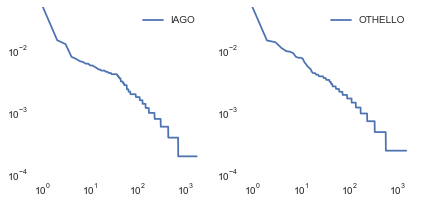

In [47]:
fig = plt.figure(figsize = (6, 3))
#IAGO plot
ax1 = fig.add_subplot(121, facecolor='white')
rank_plot(ax1, 'IAGO', freq_calc(char_nltk['IAGO.']) )
#OTHELLO plot
ax2 = fig.add_subplot(122, facecolor='white')
rank_plot(ax2, 'OTHELLO', freq_calc(char_nltk['OTHELLO.']) )
plt.tight_layout()

So far we have been just doing a raw count - that doesn't really deal with the diversity of language.

The most common and straightforward implementation of that is to look at the uniqueness of words used in comparison to the total number of words used.

In [48]:
#Exercise


Even with this simple calculation, we can see that while Iago may speak more - more of it is repeated utterances than Othello.

**Question** Is this difference significant?

In [50]:
#Exercise


**Apparent numbers (can) lie.**

This is the absolute importance of null models when dealing with data, such as text data, that breaks a classical statistical testing framework.

# Extending beyond a bag of words

So far we have only dealt with what are called `uni-grams` (i.e. single word, bag of words). Bigrams and trigrams are also a part of the picture. can you guess what they are?

In [54]:
list(nltk.bigrams(char_nltk['IAGO.']))[:20]

[('Sblood', 'hear'),
 ('hear', 'If'),
 ('If', 'ever'),
 ('ever', 'I'),
 ('I', 'dream'),
 ('dream', 'matter'),
 ('matter', 'Abhor'),
 ('Abhor', 'Despis'),
 ('Despis', 'I'),
 ('I', 'Three'),
 ('Three', 'great'),
 ('great', 'one'),
 ('one', 'citi'),
 ('citi', 'In'),
 ('In', 'person'),
 ('person', 'suit'),
 ('suit', 'make'),
 ('make', 'lieuten'),
 ('lieuten', 'Off'),
 ('Off', 'capp')]

Why do bigrams matter? Typically it is in the context of some other analysis or relationship (i.e. some statistical learning module as a feature vector). They handicap your ability to do a direct analysis (two items instead of one); however, they expand your ability to model structure.

There are a number of reasons and instances where you will want to rely on Xgrams instead of or in addition to the unigram bag of words approach in order to have a description of the text that takes structure into account. A common reason is when you have a multi-word concept that encodes meaning, which often happens in specialized fields/writing. 

Just because you perform the extraction as multiple words, doesn't mean that you cannot reduce the Xgram  to a single word token. For convenience in further processing these tokens will be joined as a single string like so:

In [ ]:
['-'.join(x) for xin list(nltk.bigrams(char_nltk['IAGO.']))[:20]]

You wouldn't join unigrams and bigrams in a bag-of-words analysis, but you would do so in applications where you are generating features from the text. 

# POS

The final basic? analysis is determining the parts of speech. This is the lead in to may other machine learning techniques that leverage parts of speech to determine structure and novelty

In [1]:
nltk.pos_tag(nltk_regex.tokenize('The fox ran quickly to its prey'))

NameError: name 'nltk' is not defined

How does this work? The simple answer is that this is a pre-trained model built from an annotated corpus. Text from that corpus has been trained like so:

`[[('today','NN'),('is','VBZ'),('good','JJ'),('day','NN')], [('yes','NNS'),('it','PRP'),('beautiful','JJ')]]`

and the model takes that learning and makes predictions on newly submitted text. The NLTK pos_tagger is trained on The Wall Street Journal corpus (clear links to source here: https://stackoverflow.com/questions/32016545/how-does-nltk-pos-tag-work/41384824)

# Spacy

Of course NLTK isn't for cool kids anymore. Now it's all about spacy. Spacy has pretrained statistical language models and an opinionated implemention of a NLP pipeline that is easy to use. 

Normally we would have to download one of these language models like so:

In [ ]:
#!python -m spacy download en_core_web_sm

But we already did this at the start of class.

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('The fox ran quickly to its prey')
for token in doc:
    print(token.text, token.pos_, token.dep_)

The DET det
fox NOUN nsubj
ran VERB ROOT
quickly ADV advmod
to ADP prep
its DET poss
prey NOUN pobj


Of course what makes everyone really care about spacy is the fact that it has that statistical model of language

In [6]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
for ent in doc.ents:
    print(ent, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


And the fact that it can handle modern web text

In [8]:
doc = nlp("Peach emoji is where it has always been. Peach is the superior "
          "emoji. It's outranking eggplant 🍑 ")
print(doc[0].text)          # 'Peach'
print(doc[1].text)          # 'emoji'
print(doc[-1].text)         # '🍑'
print(doc[17:19].text)      # 'outranking eggplant'

noun_chunks = list(doc.noun_chunks)
print(noun_chunks[0].text)  # 'Peach emoji'

sentences = list(doc.sents)
print(sentences[1].text)    # 'Peach is the superior emoji.'

Peach
emoji
🍑
outranking eggplant
Peach emoji
Peach is the superior emoji.
